In [1]:
from clustimage import Clustimage
import pandas as pd
import glob

In [2]:
# This cell is tagged as "parameters" to allow use by papermill
FILE_LIST_GLOB = '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/0*a.png'

In [3]:
mylist = glob.glob(FILE_LIST_GLOB)
mylist

['/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/000a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/027a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/022a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/021a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/046a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/062a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/029a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/071a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/061a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/055a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/059a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/005a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/063a.png',
 '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/040a.png',
 '/home/aubrey/Desktop/libcamera/t

In [4]:
cl = Clustimage()
X = cl.import_data(mylist)
results = cl.fit_transform(X['pathnames'], min_clust=1, max_clust=50)

[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 80/80 [00:00<00:00, 7057.70it/s]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 80/80 [00:00<00:00, 6480.82it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [49152] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [49152] columns of the input dataframe.
[pca] >Fitting using PCA..


[clustimage] >INFO> Extracted features using [pca]: samples=80, features=16
[clustimage] >INFO> Compute embedding using [tsne]


[pca] >Computing loadings and PCs..


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 48/48 [00:00<00:00, 810.25it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (80, 16) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


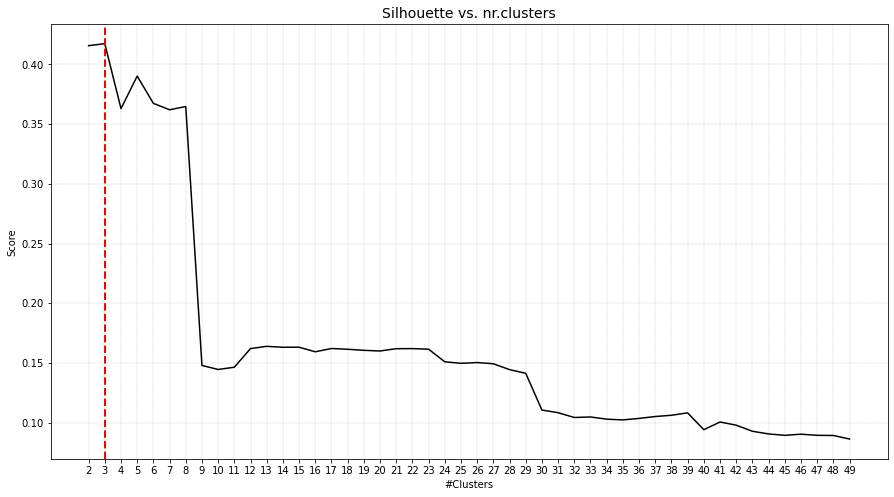

[clusteval] >Estimated number of n_clusters: 3, average silhouette_score=0.338


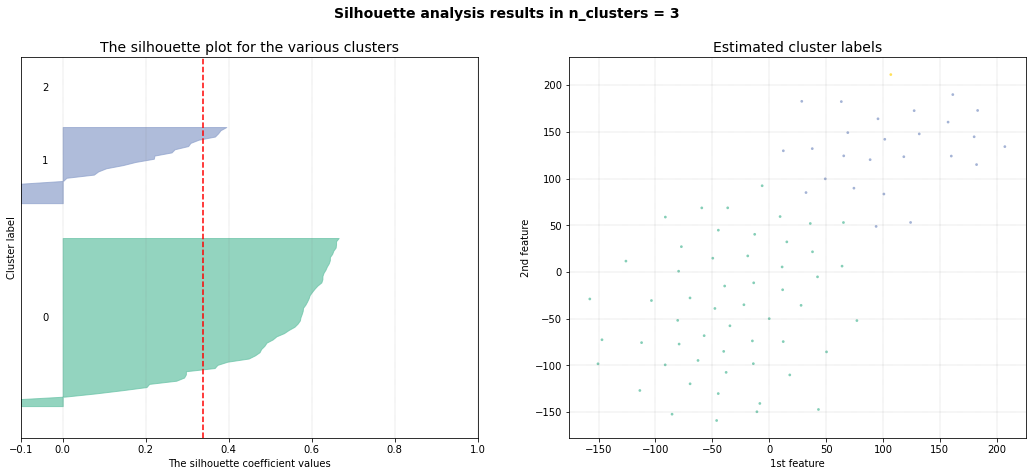

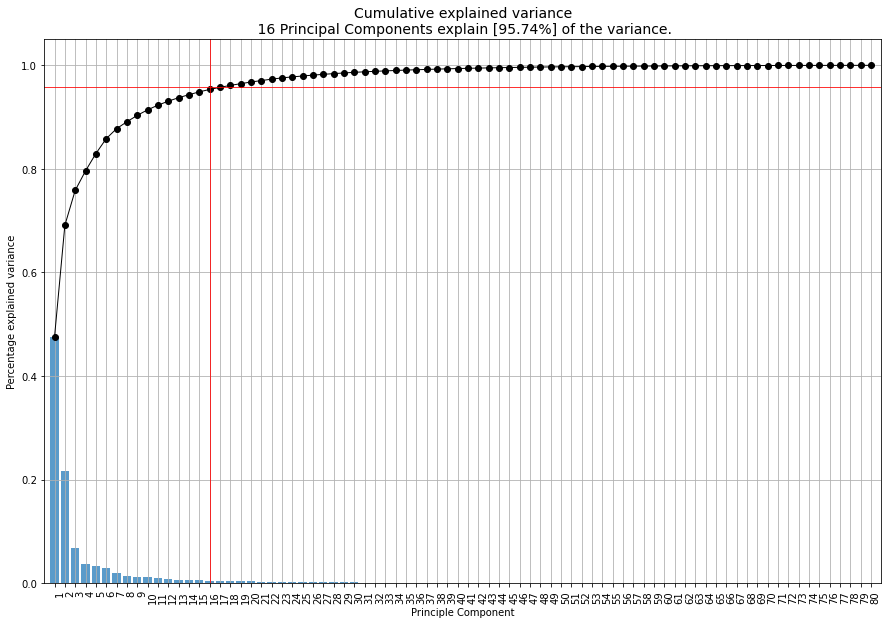

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 16 Principal Components explain [95.74%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [5]:
# Cluster evaluation
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])
cl.pca.plot()

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=28576.384. Be patient now..
[clusteval] >Compute cluster labels.


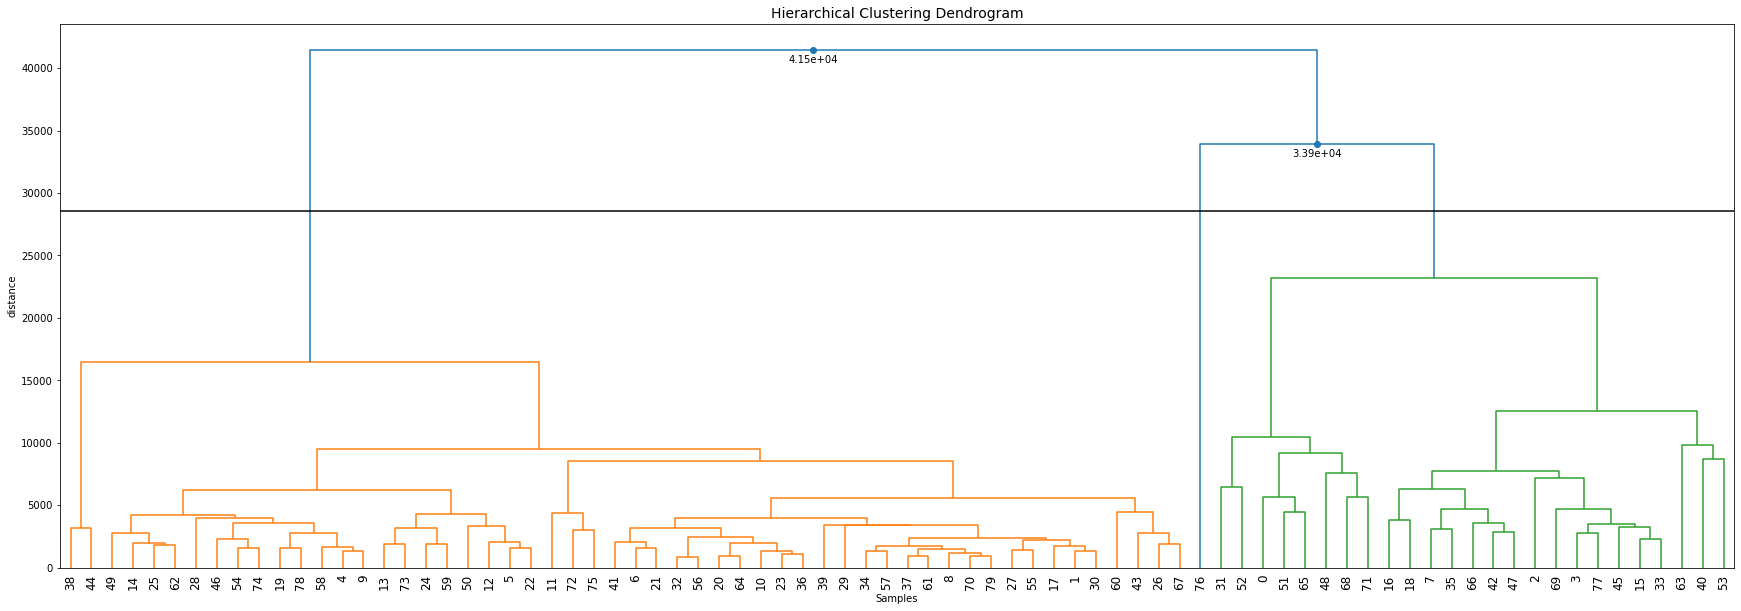

In [6]:
# Dendrogram
cl.dendrogram(figsize=(30,10))

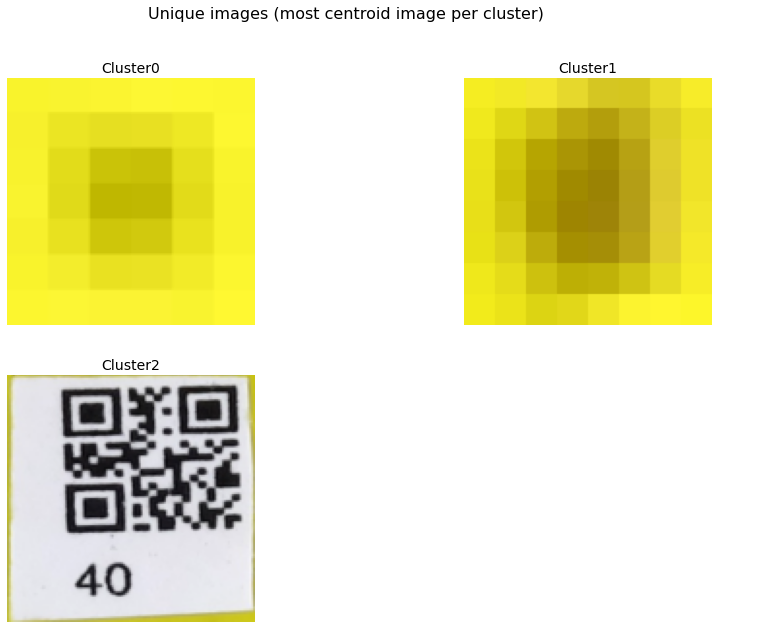

In [7]:
# Plot unique image per cluster
cl.plot_unique(img_mean=False, show_hog=True)